In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


The Fashion MNIST data is available directly in the tf.keras datasets API.

In [2]:
mnist = tf.keras.datasets.fashion_mnist


Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Visual Look of  random training images and training labels from the dataset.

0
[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 154 155 170 165 

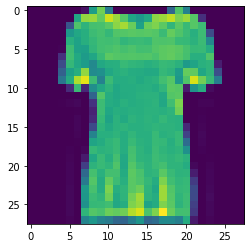

In [4]:
import numpy as np
np.set_printoptions(linewidth=300)
import matplotlib.pyplot as plt
plt.imshow(training_images[10])
print(training_labels[10])
print(training_images[10])

## Normalizing

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

## Model

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

## The model is defined and we will Now actually build it.
We will do this by compiling it with an optimizer and loss function and then we train it by calling **model.fit**, asking it to fit our training data to our training labels.

---> It will figure out a relationship between the training data and its actual labels. So in future if we have data that looks like the training data, then it will make a prediction for what that data would look like. 

In [7]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5006 - accuracy: 0.8244
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8635
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.8767
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3150 - accuracy: 0.8846
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.8923
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.8949
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.8999
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9038
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2482 - accuracy: 0.9073
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

So, the neural network is about 92% accurate in training datasets.

## Model Evaluation

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3492 - accuracy: 0.8828


[0.34919148683547974, 0.8827999830245972]

The Neural Network has 88% of accuracy with the test data.

In [9]:
classifications = model.predict(test_images)

print(classifications[0])

[1.8443165e-09 1.6102093e-10 8.4254069e-11 6.8451841e-11 1.0850396e-08 2.9896788e-05 3.5019983e-07 7.7657048e-03 2.4178352e-08 9.9220407e-01]


In [14]:
print(test_labels[110])

2
